In [1]:
!pip install pystan fbprophet

In [2]:
import pandas as pd

In [3]:
time_ser = pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET .csv")

In [4]:
time_ser["FullDate"] = pd.to_datetime(time_ser["FullDate"])
time_ser.set_index( "FullDate" , inplace= True )



# Question 11


In [5]:
time_ser.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

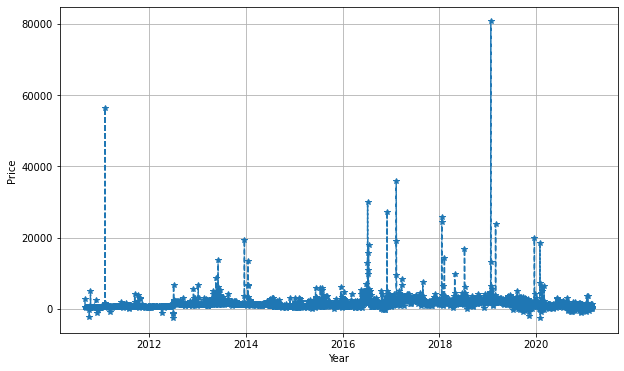

In [7]:
daily =  time_ser.resample( 'D' ).sum()
plt.figure(figsize=( 10 , 6 ))
plt.plot(daily.index, daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Price' )

# Question 12

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily['SysLoad'])

print(  'p-value for SysLoad: ',adf_result[ 1 ] )


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


p-value for SysLoad:  0.004253725504574117


In [9]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily['GasPrice'])

print(  'p-value for GasPrice: ',adf_result[ 1 ] )


p-value for GasPrice:  0.04502721288462542


# Question 13

In [10]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily['GasPrice'])
print( 'Critical Values for ElecPrice:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' ) 

Critical Values for ElecPrice:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [11]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily['ElecPrice'])
print( 'Critical Values for ElecPrice:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' ) 

Critical Values for ElecPrice:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


# Question 14

In [12]:
daily.reset_index(inplace=True)
daily.drop(['Tmax', 'SysLoad', 'GasPrice',], axis=1, inplace=True)
daily.columns = ['ds', 'y']

In [13]:
train_2 = daily[:2757]
test_2 = daily[2757:]

In [14]:
import fbprophet as Prophet

In [15]:
def mape(y_actual, y_predicted):
  mape = np.mean(np.abs((y_actual - y_predicted)/(y_actual)))*100
  return mape

In [16]:
model = Prophet.Prophet()
Model = model.fit(train_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
forecast_2 = model.predict(test_2)
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,135.948473,5062.982310,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,553.862965,4950.186790,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,355.462868,5085.962026,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,228.132453,4968.557253,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-225.046294,4800.974032,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,581.807417,6486.175809,1933.003501,5401.060002,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,539.031360,6525.093830,1931.557304,5403.396372,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,484.421402,6176.493381,1930.386891,5405.732742,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,101.216551,5997.494119,1929.568835,5409.130542,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


In [18]:
test_2['y'].reset_index(drop=True, inplace=True)


In [19]:
print('MAPE is :', round(mape(test_2['y'], forecast_2['yhat']),2))

MAPE is : 549.48


# Question 15

In [20]:
def rmse(y_actual, y_predicted):
  rmse = np.sqrt(np.mean(np.square(y_actual - y_predicted)))
  return rmse

print('rmse is', round(rmse(test_2['y'], forecast_2['yhat']), 2))


rmse is 3218.16


# Question 16

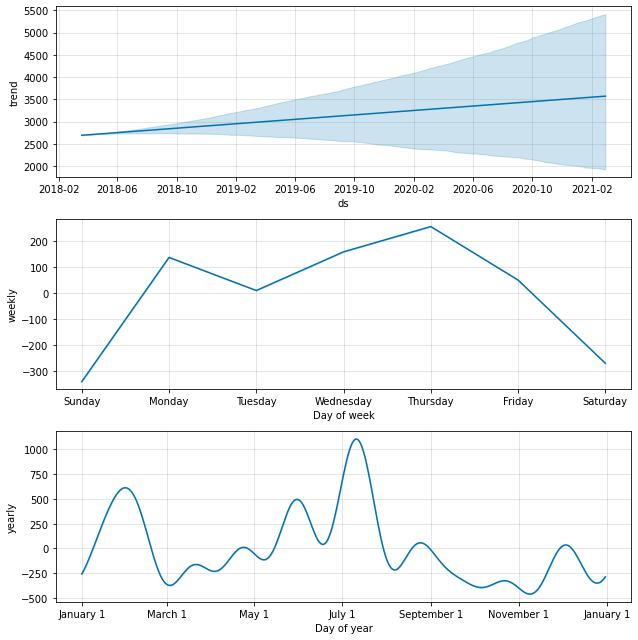

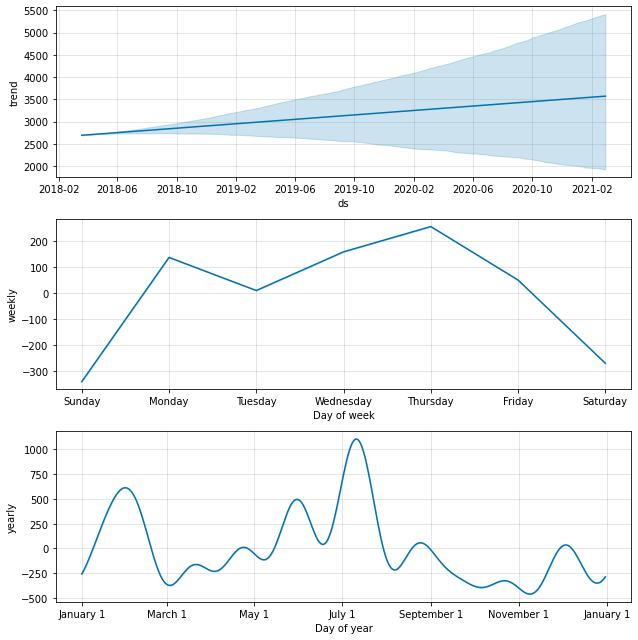

In [21]:
Model.plot_components(forecast_2)

## July is the month with the highest seasonality


In [22]:
np.sqrt(1000)

31.622776601683793

# Question 17

In [23]:
daily_2 = time_ser.resample( 'D' ).sum() 
daily_2.reset_index(inplace=True)
daily_2.columns = ['ds', 'add2', 'add1', 'add3', 'y']
daily_2 = daily_2.reindex(['ds', 'y', 'add1', 'add2', 'add3'], axis=1)

In [24]:
train_3 = daily_2[:2757] # splitting to train and test dataframe
test_3 = daily_2[2757:]

In [25]:
m = Prophet.Prophet()

In [26]:
m.add_regressor('add1', standardize=False)
m.add_regressor('add2', standardize=False)
m.add_regressor('add3', standardize=False)

In [27]:
Model = m.fit(train_3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
forecast_3 = m.predict(test_3)
forecast_3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,-1273.630620,-257.096109,4361.028379,-1273.630620,-1273.630620,434.030876,434.030876,434.030876,-0.049902,...,-85.057810,-85.057810,-85.057810,-46.963866,-46.963866,-46.963866,0.0,0.0,0.0,1962.434513
1,2018-03-21,-1272.984996,-142.472481,4086.142247,-1272.984996,-1272.984996,262.669167,262.669167,262.669167,-0.052786,...,42.399632,42.399632,42.399632,-37.982162,-37.982162,-37.982162,0.0,0.0,0.0,1952.432368
2,2018-03-22,-1272.339373,691.480332,5004.384685,-1272.339373,-1272.339373,1080.538169,1080.538169,1080.538169,-0.066758,...,145.079334,145.079334,145.079334,-33.256366,-33.256366,-33.256366,0.0,0.0,0.0,2878.338520
3,2018-03-23,-1271.693750,412.298530,4789.598089,-1271.693750,-1271.693750,1020.124407,1020.124407,1020.124407,-0.074964,...,-44.832553,-44.832553,-44.832553,-32.640527,-32.640527,-32.640527,0.0,0.0,0.0,2562.161925
4,2018-03-24,-1271.048126,-798.897890,3643.699934,-1271.048126,-1271.048126,212.226946,212.226946,212.226946,-0.076960,...,-116.824668,-116.824668,-116.824668,-35.879405,-35.879405,-35.879405,0.0,0.0,0.0,1411.434957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,-581.522398,-1561.740057,3133.272533,-1653.676737,316.746105,-86.023207,-86.023207,-86.023207,-0.049680,...,42.399632,42.399632,42.399632,-439.307406,-439.307406,-439.307406,0.0,0.0,0.0,891.683938
1073,2021-02-25,-580.876774,-1125.947557,3526.614907,-1654.287104,317.953225,255.959847,255.959847,255.959847,-0.047906,...,145.079334,145.079334,145.079334,-465.771665,-465.771665,-465.771665,0.0,0.0,0.0,1253.835342
1074,2021-02-26,-580.231151,-1136.784053,3858.083670,-1654.897470,320.981737,536.667533,536.667533,536.667533,-0.050568,...,-44.832553,-44.832553,-44.832553,-486.446250,-486.446250,-486.446250,0.0,0.0,0.0,1319.883709
1075,2021-02-27,-579.585528,-1619.043661,3502.743465,-1655.507836,321.962326,278.166424,278.166424,278.166424,-0.052120,...,-116.824668,-116.824668,-116.824668,-501.096916,-501.096916,-501.096916,0.0,0.0,0.0,973.916750


In [29]:
test_3['y'].reset_index(drop=True, inplace=True)

In [30]:
print('MAPE is :', round(mape(test_3['y'], forecast_3['yhat']),2))

MAPE is : 223.2


# Question 18

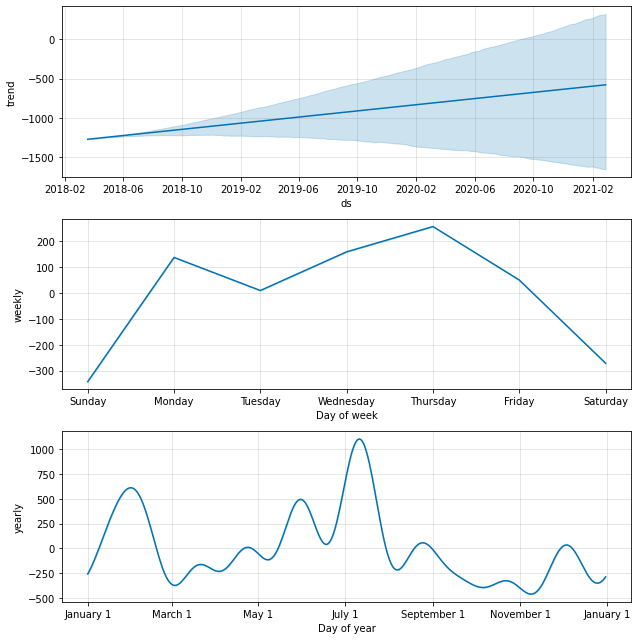

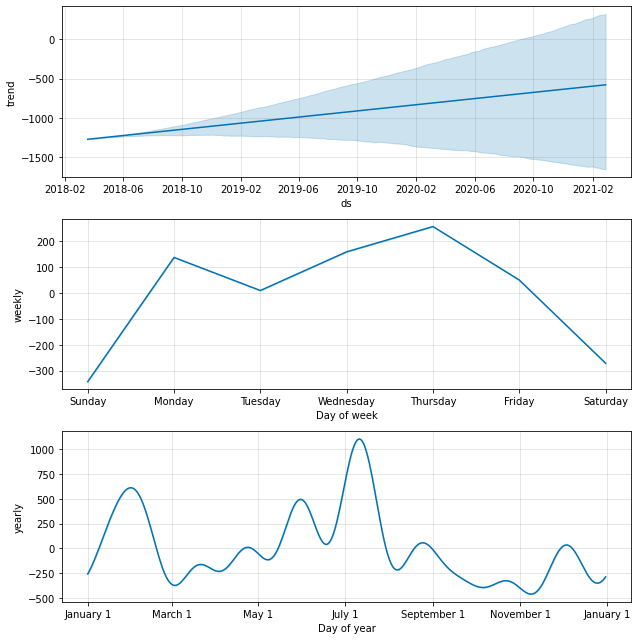

In [31]:
model.plot_components(forecast_3)

## Thursday is the day of the week with the highest seasonality

# Question 20

In [32]:
m2 = Prophet.Prophet()


In [33]:
m2.add_regressor('add1', standardize=False)
m2.add_regressor('add3', standardize=False)

In [34]:
train_3.drop('add2', axis=1, inplace=True)
model2 = m2.fit(train_3)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
test_3.drop('add2', axis=1, inplace=True)
forecast_3 = m2.predict(test_3)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
test_3.reset_index(drop=True, inplace=True)

In [38]:
print('MAPE is :', round(mape(test_3['y'], forecast_3['yhat']),2))

MAPE is : 257.82
